In [15]:
import pandas as pd
pd.options.display.max_rows = 150

import math

In [16]:
data = pd.read_pickle('data_topicfts.pkl')
data = data.loc[data['Country'] != "NaN"]
data['score'] = pd.read_pickle('cleanData.pkl')["score"].tolist()[:115]
data

,cabin,date,Recommended,text,origin,destin,Country,sentiment_com,sentiment_pos,sentiment_neg,...,cleanText,topic_plane,topic_luggage,topic_time,topic_service,topic_food,topic_price,topic_staff,topic_crew,score
0,Economy,2015-10-01,0,We flew with Germanwings (or tried to) on Sept...,Stuttgart,Amsterdam,Canada,-0.6492,0.000,0.035,...,"[[September], [counter, information], [counter...",0,0,1,0,0,0,0,0,2
1,Economy,2015-10-01,0,I am less than impressed with Germanwings serv...,Hamburg,London,United Kingdom,-0.2173,0.074,0.106,...,"[[service], [connection, stewardess, water, ev...",1,0,0,0,0,0,0,0,3
2,Economy,2015-09-01,0,Flew from Palma de Mallorca to Cologne with Ge...,PMI,CGN,Germany,0.9037,0.146,0.052,...,"[[Flew, Palma, Mallorca], [Check-in, row], [pl...",0,0,0,0,0,0,0,1,3
3,NaN,2015-09-01,1,Good flight from Berlin-Tegel to London Heathr...,Berlin-Tegel,London,Germany,0.3010,0.206,0.203,...,"[[Heathrow, staff], [Delay, Berlin, behaf], [l...",0,0,0,0,1,0,0,0,10
4,Economy,2015-09-01,0,I don't get why Germanwings is always late and...,CGN,LHR,Germany,-0.2975,0.048,0.070,...,"[[service], [ground, staff, departure, arrival...",0,0,0,0,0,0,0,1,4
5,Economy,2015-09-01,0,We were delayed 5 hours in Istanbul and receiv...,Istanbul,London,United Kingdom,-0.9670,0.017,0.112,...,"[[sandwich, plane, compensation], [cabin, day,...",0,1,0,0,0,0,0,0,1
6,Economy,2015-09-01,1,Easy Check-In at Düsseldorf. The Germanwings f...,Düsseldorf,London,Germany,0.3400,0.162,0.137,...,"[[Check-In], [time], [airline], [food], [Ticke...",0,1,0,0,0,0,0,0,7
7,Economy,2015-09-01,0,Checked in at Dusseldorf for our Germanwings f...,Dusseldorf,Heathrow,United Kingdom,-0.8271,0.074,0.137,...,"[[person, cancellation, yesterday], [question]...",0,1,0,0,0,0,0,0,2
8,Economy,2015-08-01,0,This Germanwings flight should take off as sch...,Duesseldorf,Heathrow,Gibraltar,-0.5132,0.058,0.109,...,"[[plane], [Transfer, bus, Air, Düsseldorf], [b...",1,0,0,0,0,0,0,0,2
9,Economy,2015-08-01,0,Germanwings is a very mediocre airline. Compar...,Cologne,Palma,Australia,-0.7629,0.055,0.229,...,"[[airline], [], [anything, food, product], []]",0,0,0,1,1,0,0,0,5


In [4]:
def getEntropy(values):
    P = sum(values)
    N = len(values) - P
    
#     print (P,N)
    
    if P == 0 or N == 0:
        return 0, P, N
    
    A = (-P/(P+N))*math.log2(P/(P+N))
    B = (-N/(P+N))*math.log2(N/(P+N))
    
    
    return A+B, P, N

#topics
for i in [x for x in data.columns if "topic_" in x]:
    print (i, getEntropy(data.loc[(data[i] == 1)]["Recommended"].tolist()))
print("---------------------")

#countries
for i in list(set(data["Country"].tolist())):
    print (i, getEntropy(data.loc[(data["Country"] == i)]["Recommended"].tolist()))
print("---------------------")

#origin
for i in list(set(data["origin"].tolist())):
    print (i, getEntropy(data.loc[(data["origin"] == i)]["Recommended"].tolist()))
print("---------------------")

#destin
for i in list(set(data["destin"].tolist())):
    print (i, getEntropy(data.loc[(data["destin"] == i)]["Recommended"].tolist()))
print("---------------------")

#sentiment
for i in range(-9,9):
    j = i/10
    print ("senti_greater_than", j, getEntropy(data.loc[(data["sentiment_com"] > j)]["Recommended"].tolist()))
    print ("senti_lesserr_than", j, getEntropy(data.loc[(data["sentiment_com"] < j)]["Recommended"].tolist()))

print("---------------------")


topic_plane (0.9819407868640976, 11, 8)
topic_luggage (0.9986359641585718, 12, 11)
topic_time (0.9612366047228759, 5, 8)
topic_service (0.9544340029249649, 5, 3)
topic_food (0.9612366047228759, 8, 5)
topic_price (1.0, 2, 2)
topic_staff (0.8997437586982626, 13, 6)
topic_crew (0.9544340029249649, 9, 15)
---------------------
Croatia (0, 1, 0)
Australia (0, 0, 1)
Italy (0, 2, 0)
Czech Republic (0.9182958340544896, 2, 1)
Germany (0.999609836367807, 21, 22)
Austria (0, 2, 0)
United States (0.7219280948873623, 4, 1)
United Kingdom (0.9985090989176322, 23, 21)
Finland (0, 0, 1)
Ireland (0, 0, 1)
France (0, 0, 1)
Canada (1.0, 1, 1)
Gibraltar (0, 0, 1)
China (0, 1, 0)
Netherlands (0.863120568566631, 5, 2)
---------------------
Bonn (1.0, 1, 1)
EDI (0, 1, 0)
SPU (0, 0, 1)
low (0, 1, 0)
Munich (0, 1, 0)
Berlin (1.0, 1, 1)
TXL (0, 1, 0)
STN (0.8112781244591328, 3, 1)
BRE (0, 1, 0)
having (0, 1, 0)
re (0, 0, 1)
Vienna (0, 1, 0)
Istanbul (1.0, 1, 1)
Duesseldorf (0, 0, 1)
Bologna (0, 1, 0)
Barcelona 

In [17]:
def getSentEntropy(values):
    P = sum([1 for x in values if x>0.5])
    N = sum([1 for x in values if x<-0.5])
    
#     print (P,N)
    
    if P == 0 or N == 0:
        return 0, P, N
    
    A = (-P/(P+N))*math.log2(P/(P+N))
    B = (-N/(P+N))*math.log2(N/(P+N))
    
    
    return A+B, P, N


#topics
for i in [x for x in data.columns if "topic_" in x]:
    print (i, getSentEntropy(data.loc[(data[i] == 1)]["sentiment_com"].tolist()))
print("---------------------")

topic_plane (0.8739810481273578, 12, 5)
topic_luggage (1.0, 9, 9)
topic_time (0.9709505944546686, 4, 6)
topic_service (0.9852281360342515, 4, 3)
topic_food (0.9940302114769565, 5, 6)
topic_price (0.9182958340544896, 2, 1)
topic_staff (0.6722948170756379, 14, 3)
topic_crew (0.8524051786494785, 13, 5)
---------------------


In [6]:
data.head()

,cabin,date,Recommended,text,origin,destin,Country,sentiment_com,sentiment_pos,sentiment_neg,sentiment_neu,cleanText,topic_plane,topic_luggage,topic_time,topic_service,topic_food,topic_price,topic_staff,topic_crew
0,Economy,2015-10-01,0,We flew with Germanwings (or tried to) on Sept...,Stuttgart,Amsterdam,Canada,-0.6492,0.000,0.035,0.965,"[[September], [counter, information], [counter...",0,0,1,0,0,0,0,0
1,Economy,2015-10-01,0,I am less than impressed with Germanwings serv...,Hamburg,London,United Kingdom,-0.2173,0.074,0.106,0.820,"[[service], [connection, stewardess, water, ev...",1,0,0,0,0,0,0,0
2,Economy,2015-09-01,0,Flew from Palma de Mallorca to Cologne with Ge...,PMI,CGN,Germany,0.9037,0.146,0.052,0.802,"[[Flew, Palma, Mallorca], [Check-in, row], [pl...",0,0,0,0,0,0,0,1
3,NaN,2015-09-01,1,Good flight from Berlin-Tegel to London Heathr...,Berlin-Tegel,London,Germany,0.3010,0.206,0.203,0.591,"[[Heathrow, staff], [Delay, Berlin, behaf], [l...",0,0,0,0,1,0,0,0
4,Economy,2015-09-01,0,I don't get why Germanwings is always late and...,CGN,LHR,Germany,-0.2975,0.048,0.070,0.882,"[[service], [ground, staff, departure, arrival...",0,0,0,0,0,0,0,1


In [18]:
topicTitles = ["topic_plane","topic_luggage","topic_time","topic_service","topic_food","topic_price","topic_staff","topic_crew"]

In [58]:
D = {}
E = {}
for i in [x for x in data.columns if "topic_" in x]:
    D[i[6:]] = data.loc[(data[i] == 1)]["sentiment_com"].mean()
    E[i[6:]] = data.loc[(data[i] == 1)]["sentiment_com"].std()
D

{'plane': 0.31639999999999996,
 'luggage': 0.06703913043478262,
 'time': -0.11592307692307696,
 'service': 0.06561249999999996,
 'food': -0.005461538461538475,
 'price': 0.3699,
 'staff': 0.49391578947368425,
 'crew': 0.29535}

In [56]:
E

{'plane': 0.35058623285386814,
 'luggage': 0.3870243141114505,
 'time': 0.34097256069577786,
 'service': 0.41751198565986447,
 'food': 0.4103408032449275,
 'price': 0.3269822242874985,
 'staff': 0.3356475020444141,
 'crew': 0.34755911164427344}

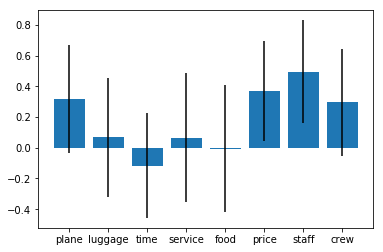

In [57]:



import matplotlib.pyplot as plt


plt.bar(range(len(D)), D.values(), yerr=E.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

In [126]:
import datetime
date_group = data[["date", "sentiment_com"]]

date_group.rename(columns={'sentiment_com':'germanwings'},inplace=True)

date_group['month'] = list(map(lambda x:datetime.datetime.strptime(str(x)[:7],'%Y-%m'),date_group.date))
date_group = date_group.drop(columns="date")

date_group = date_group.sort_values('month', ascending=True)
date_group = date_group.groupby(['month']).mean()

date_group.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,germanwings
month,
2009-10-01,0.60590
2010-01-01,-0.13020
2010-02-01,-0.94175
2010-03-01,-0.68580
2010-05-01,-0.97670


In [127]:

easy = pd.read_pickle('easyjet_dateGroups.pkl')
easy.head()

,easyjet
month,
2013-03-01,0.250640
2013-04-01,0.517836
2013-05-01,0.439312
2013-06-01,0.198775
2013-07-01,0.310667


In [136]:
df_outer = pd.merge(date_group, easy, on='month', how='outer')
df_outer = df_outer.sort_values('month', ascending=True)
df_outer = df_outer[22:]

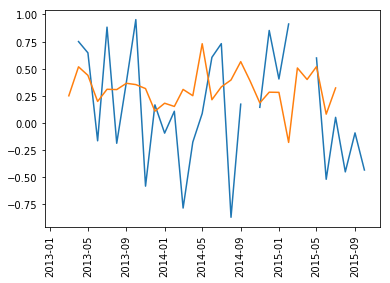

<Figure size 576x432 with 0 Axes>

In [137]:
plt.plot(df_outer)
plt.xticks(rotation='vertical')
x = plt.figure(figsize=(8, 6))
